# Quick Investigation on Data

In [83]:
#Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
#Read data
data_set = pd.read_csv("data/GrandMaster_Ranked_Games.csv")
data_set.head()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
1,4233222221,1686,0,0,1,0,0,0,0,0,...,59,78424,58032,640,73,14.6,214,5,31415,61040
2,4233113995,1588,1,1,1,1,0,1,2,1,...,30,62134,47408,608,63,12.6,133,5,27846,32107
3,4229230455,1126,1,0,1,0,1,0,1,0,...,13,32999,32064,461,53,10.6,92,3,23511,10775
4,4228244819,1262,1,0,0,0,1,1,3,0,...,5,35272,35372,506,54,10.8,113,2,17891,24158


In [85]:
#About Data
data_set.describe()
data_set.info()
data_set.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65896 entries, 0 to 65895
Data columns (total 50 columns):
gameId                     65896 non-null int64
gameDuraton                65896 non-null int64
blueWins                   65896 non-null int64
blueFirstBlood             65896 non-null int64
blueFirstTower             65896 non-null int64
blueFirstBaron             65896 non-null int64
blueFirstDragon            65896 non-null int64
blueFirstInhibitor         65896 non-null int64
blueDragonKills            65896 non-null int64
blueBaronKills             65896 non-null int64
blueTowerKills             65896 non-null int64
blueInhibitorKills         65896 non-null int64
blueWardPlaced             65896 non-null int64
blueWardkills              65896 non-null int64
blueKills                  65896 non-null int64
blueDeath                  65896 non-null int64
blueAssist                 65896 non-null int64
blueChampionDamageDealt    65896 non-null int64
blueTotalGold              

(65896, 50)

#  Co-relation Matrix

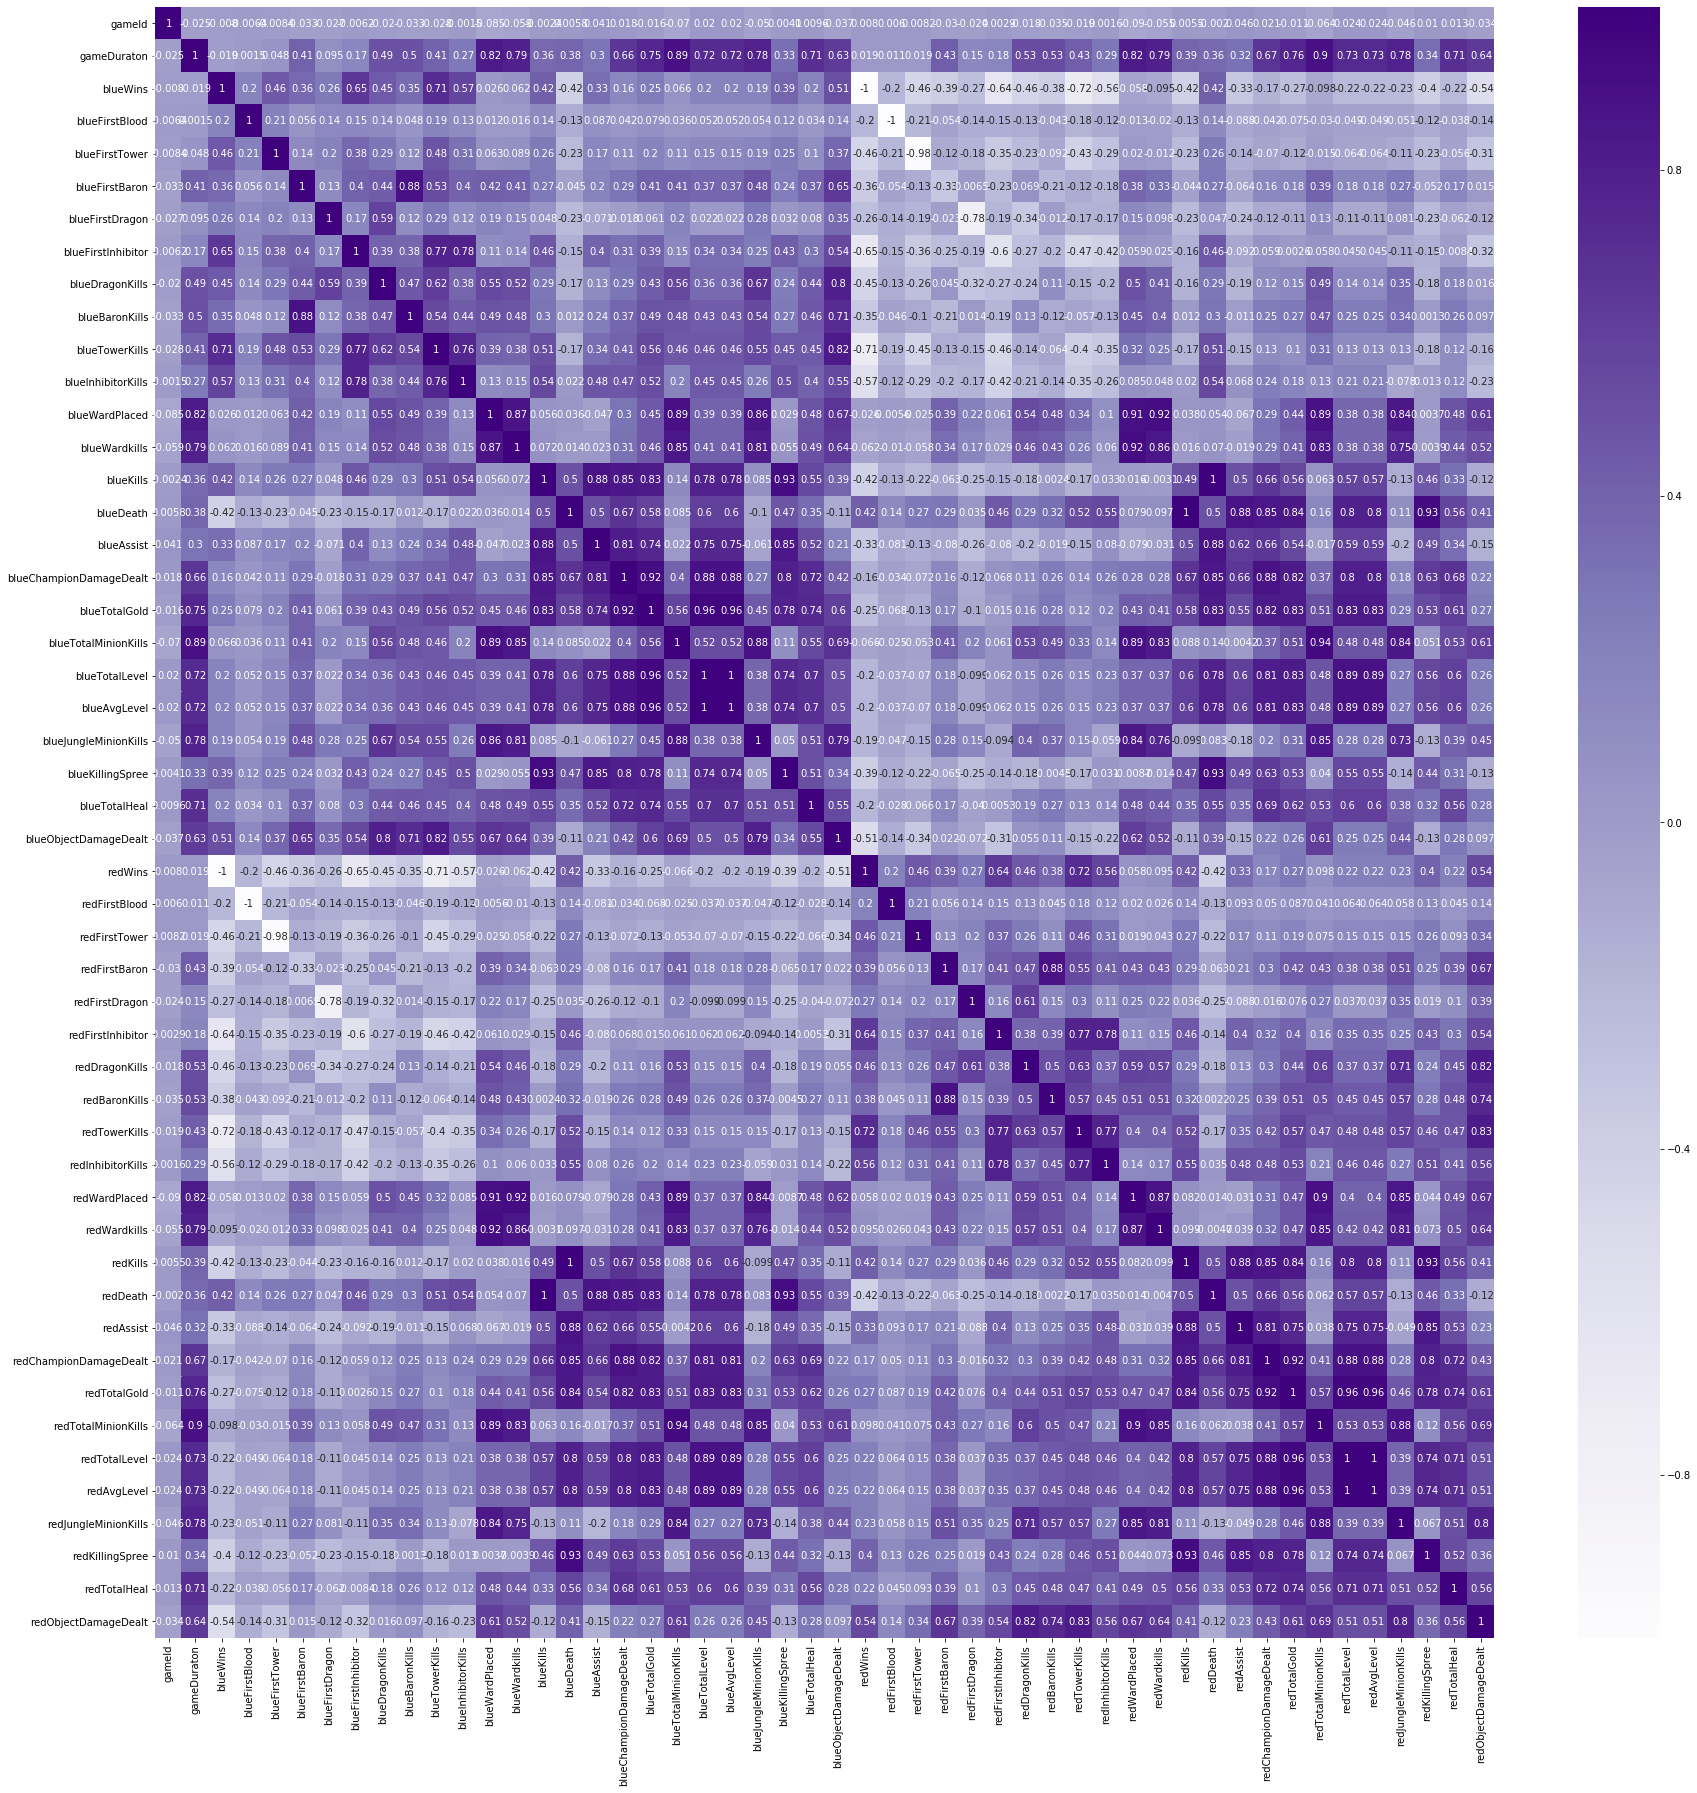

In [86]:
#Represented with heatmap:
plt.figure(figsize = (30,30))
sns.heatmap(data_set.corr(),annot = True,cmap = plt.cm.Purples)
plt.show()

### Necessary modifications on the main data
We delete columns that affects negatively our data + deleting unnecessary columns

### Removed because of being unrelated:
- gameId
- gameDuraton

### Removed because of information is derivable from other team:
- redFirstBlood
- redFirstTower
- redFirstDragon
- redFirstInhibitor

### Combined because of their difference makes much more sense:
Game winner is mostly related with making gaps and being advantegous team

- DragonKills
- BaronKills
- InhibitorKills
- WardPlaced
- WardKills
- Assist
- ChampionDamageDealt
- JungleMinionKills
- TotalHeal

### Needs to be deleted because they are really co-related with win condition:

- TotalGold, TotalMinionKills, TotalTowerKills, TotalLevel
- AvgLevel
- Kills
- Death
- ObjectDamageDealt

According to investigation we did on original data, 

Winning and losing, both seek to secure objectives.
Differences in dragon,baron,tower, and inhibitors are greater than the differences in gold/creep score (CS)/wards placed/wards destroyed
Overall, the differences in macro management is greater than the differences in micro management

Dataset will benefit from a transformation to move closer to a normal distribution.
That's why we dropped some of these macros and kept more micros.

In [87]:
data_set = data_set.drop(['gameId','gameDuraton', 'redWins','redFirstBlood','redFirstTower','redFirstBaron','redFirstDragon','redFirstInhibitor'],axis = 1)
data_set['blueDragonKills']=data_set['blueDragonKills']-data_set['redDragonKills']
data_set['blueBaronKills']=data_set['blueBaronKills']-data_set['redBaronKills']
data_set['blueTowerKills']=data_set['blueTowerKills']-data_set['redTowerKills']
data_set['blueInhibitorKills']=data_set['blueInhibitorKills']-data_set['redInhibitorKills']
data_set['blueWardPlaced']=data_set['blueWardPlaced']-data_set['redWardPlaced']
data_set['blueWardkills']=data_set['blueWardkills']-data_set['redWardkills']
data_set['blueKills']=data_set['blueKills']-data_set['redKills']
data_set['blueDeath']=data_set['blueDeath']-data_set['redDeath']
data_set['blueAssist']=data_set['blueAssist']-data_set['redAssist']
data_set['blueChampionDamageDealt']=data_set['blueChampionDamageDealt']-data_set['redChampionDamageDealt']
data_set['blueTotalGold']=data_set['blueTotalGold']-data_set['redTotalGold']
data_set['blueTotalMinionKills']=data_set['blueTotalMinionKills']-data_set['redTotalMinionKills']
data_set['blueTotalLevel']=data_set['blueTotalLevel']-data_set['redTotalLevel']
data_set['blueJungleMinionKills']=data_set['blueJungleMinionKills']-data_set['redJungleMinionKills']
data_set['blueObjectDamageDealt']=data_set['blueObjectDamageDealt']-data_set['redObjectDamageDealt']
data_set['blueTotalHeal']=data_set['blueTotalHeal']-data_set['redTotalHeal']
data_set = data_set.drop(['redDragonKills','redBaronKills','redTowerKills','redInhibitorKills','redWardPlaced','redWardkills','redKills','redDeath','redAssist','redChampionDamageDealt','redTotalGold','redTotalMinionKills'],axis = 1)
data_set = data_set.drop(['redTotalLevel','redJungleMinionKills','redObjectDamageDealt','redTotalHeal','redKillingSpree','redAvgLevel'],axis=1)

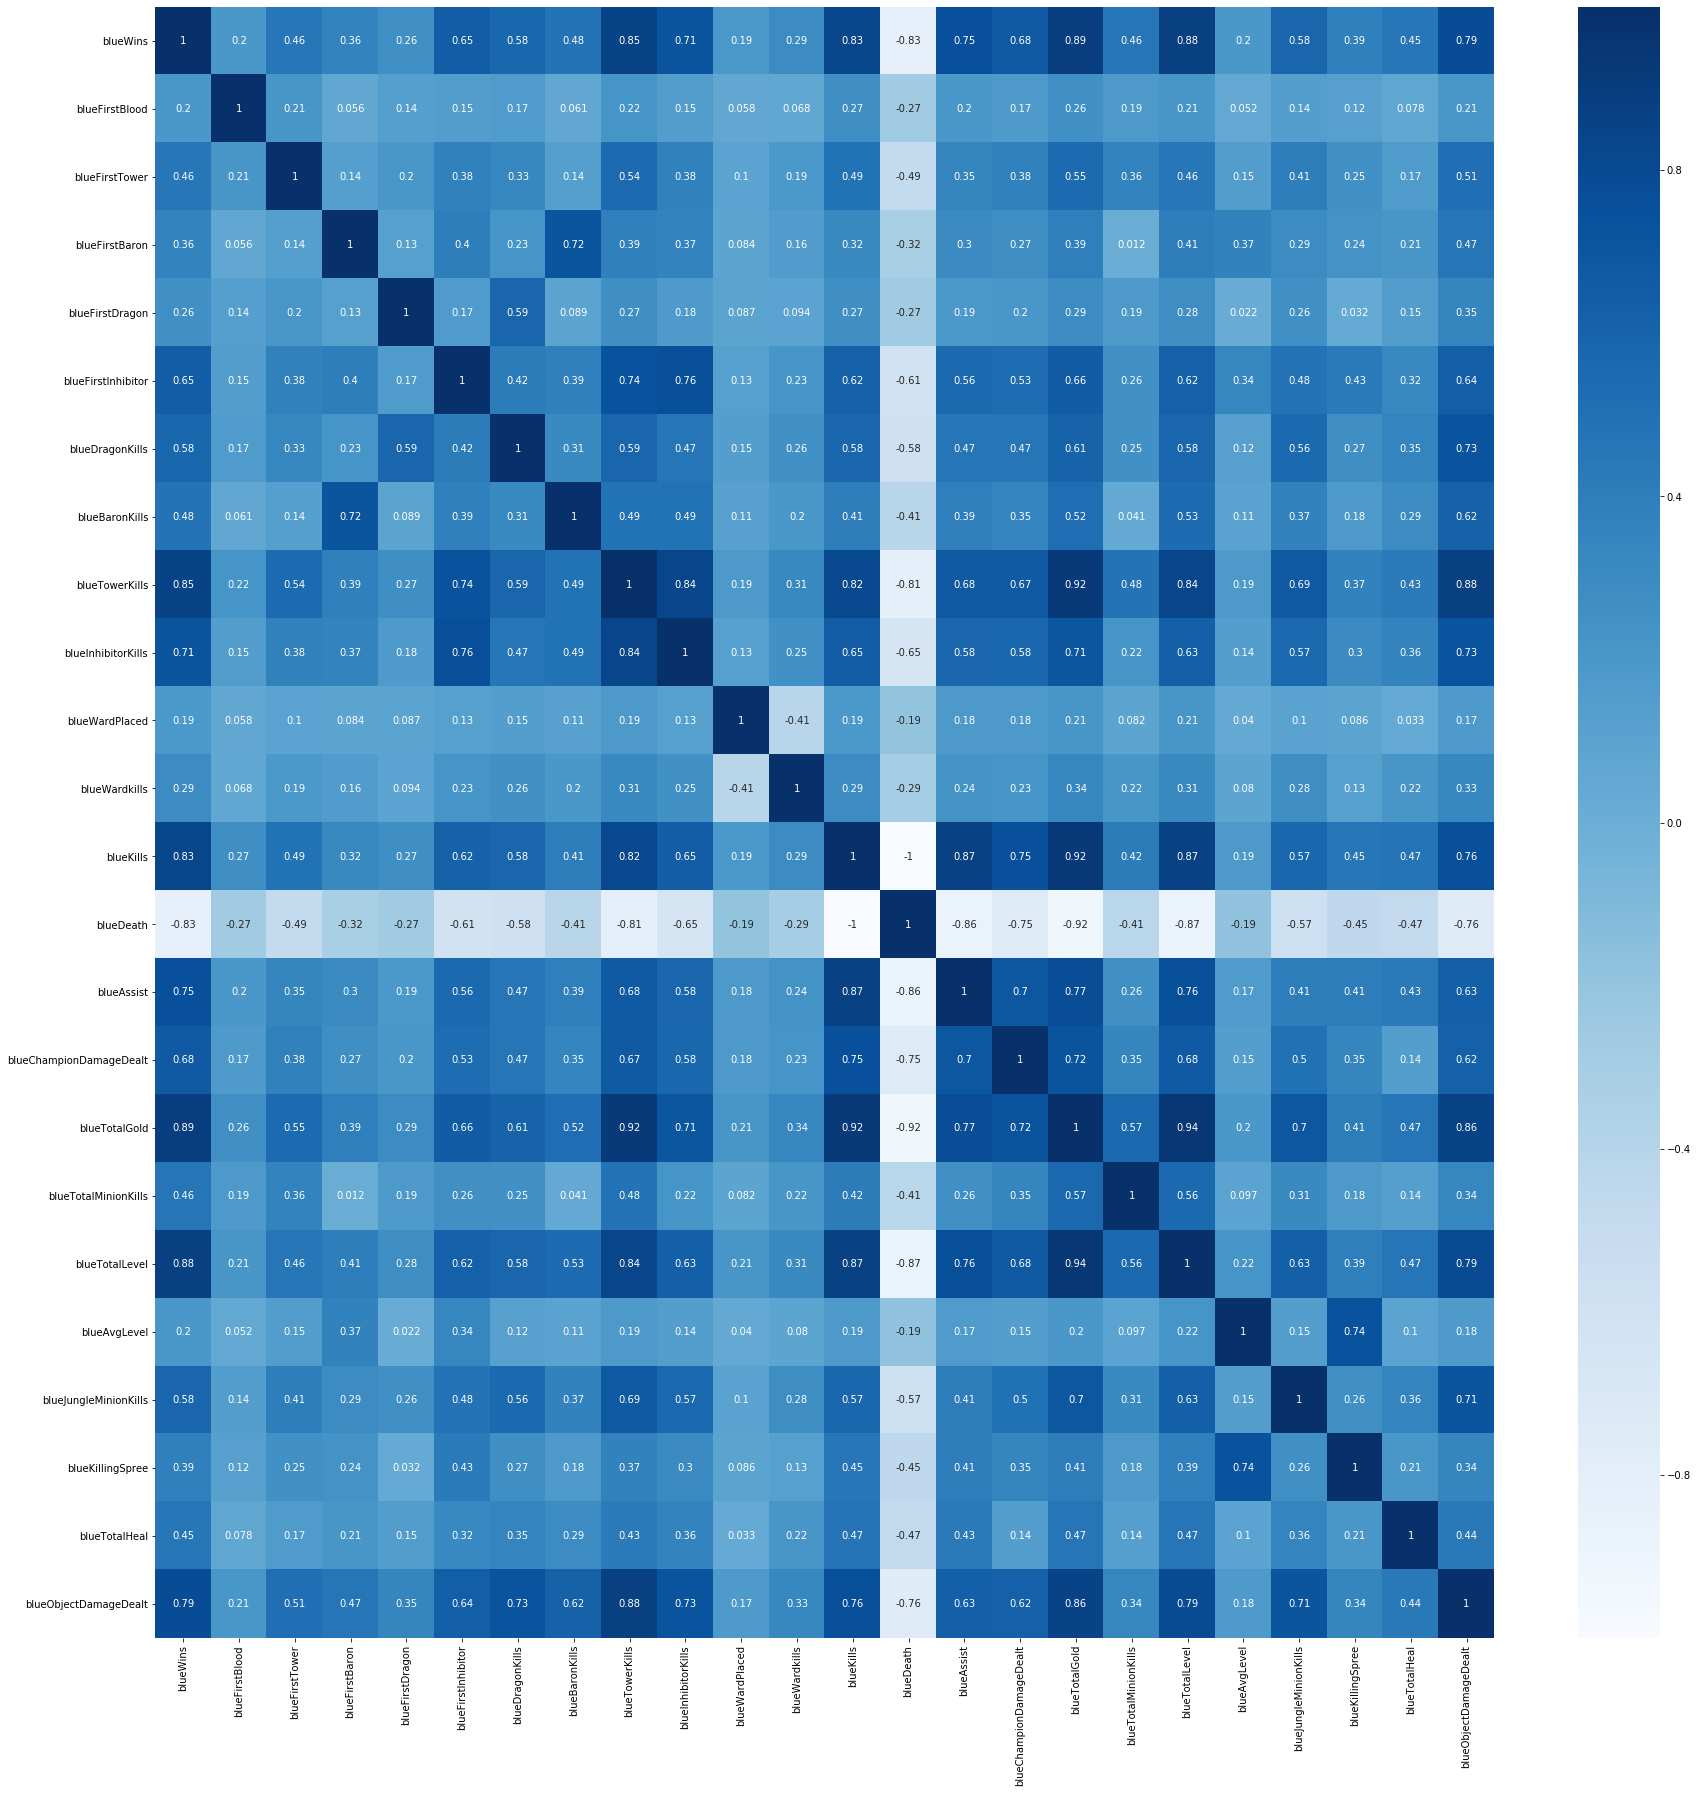

In [88]:
#Co-relation matrix revisited
plt.figure(figsize = (30,30))
sns.heatmap(data_set.corr(),annot = True,cmap = plt.cm.Blues)
plt.show()

In [89]:
#From this co-relation matrix we wanted to get rid of very informative columns
data_set = data_set.drop(['blueAvgLevel','blueTotalGold','blueTowerKills','blueTotalLevel','blueKills','blueKillingSpree','blueObjectDamageDealt','blueDeath'],axis=1)

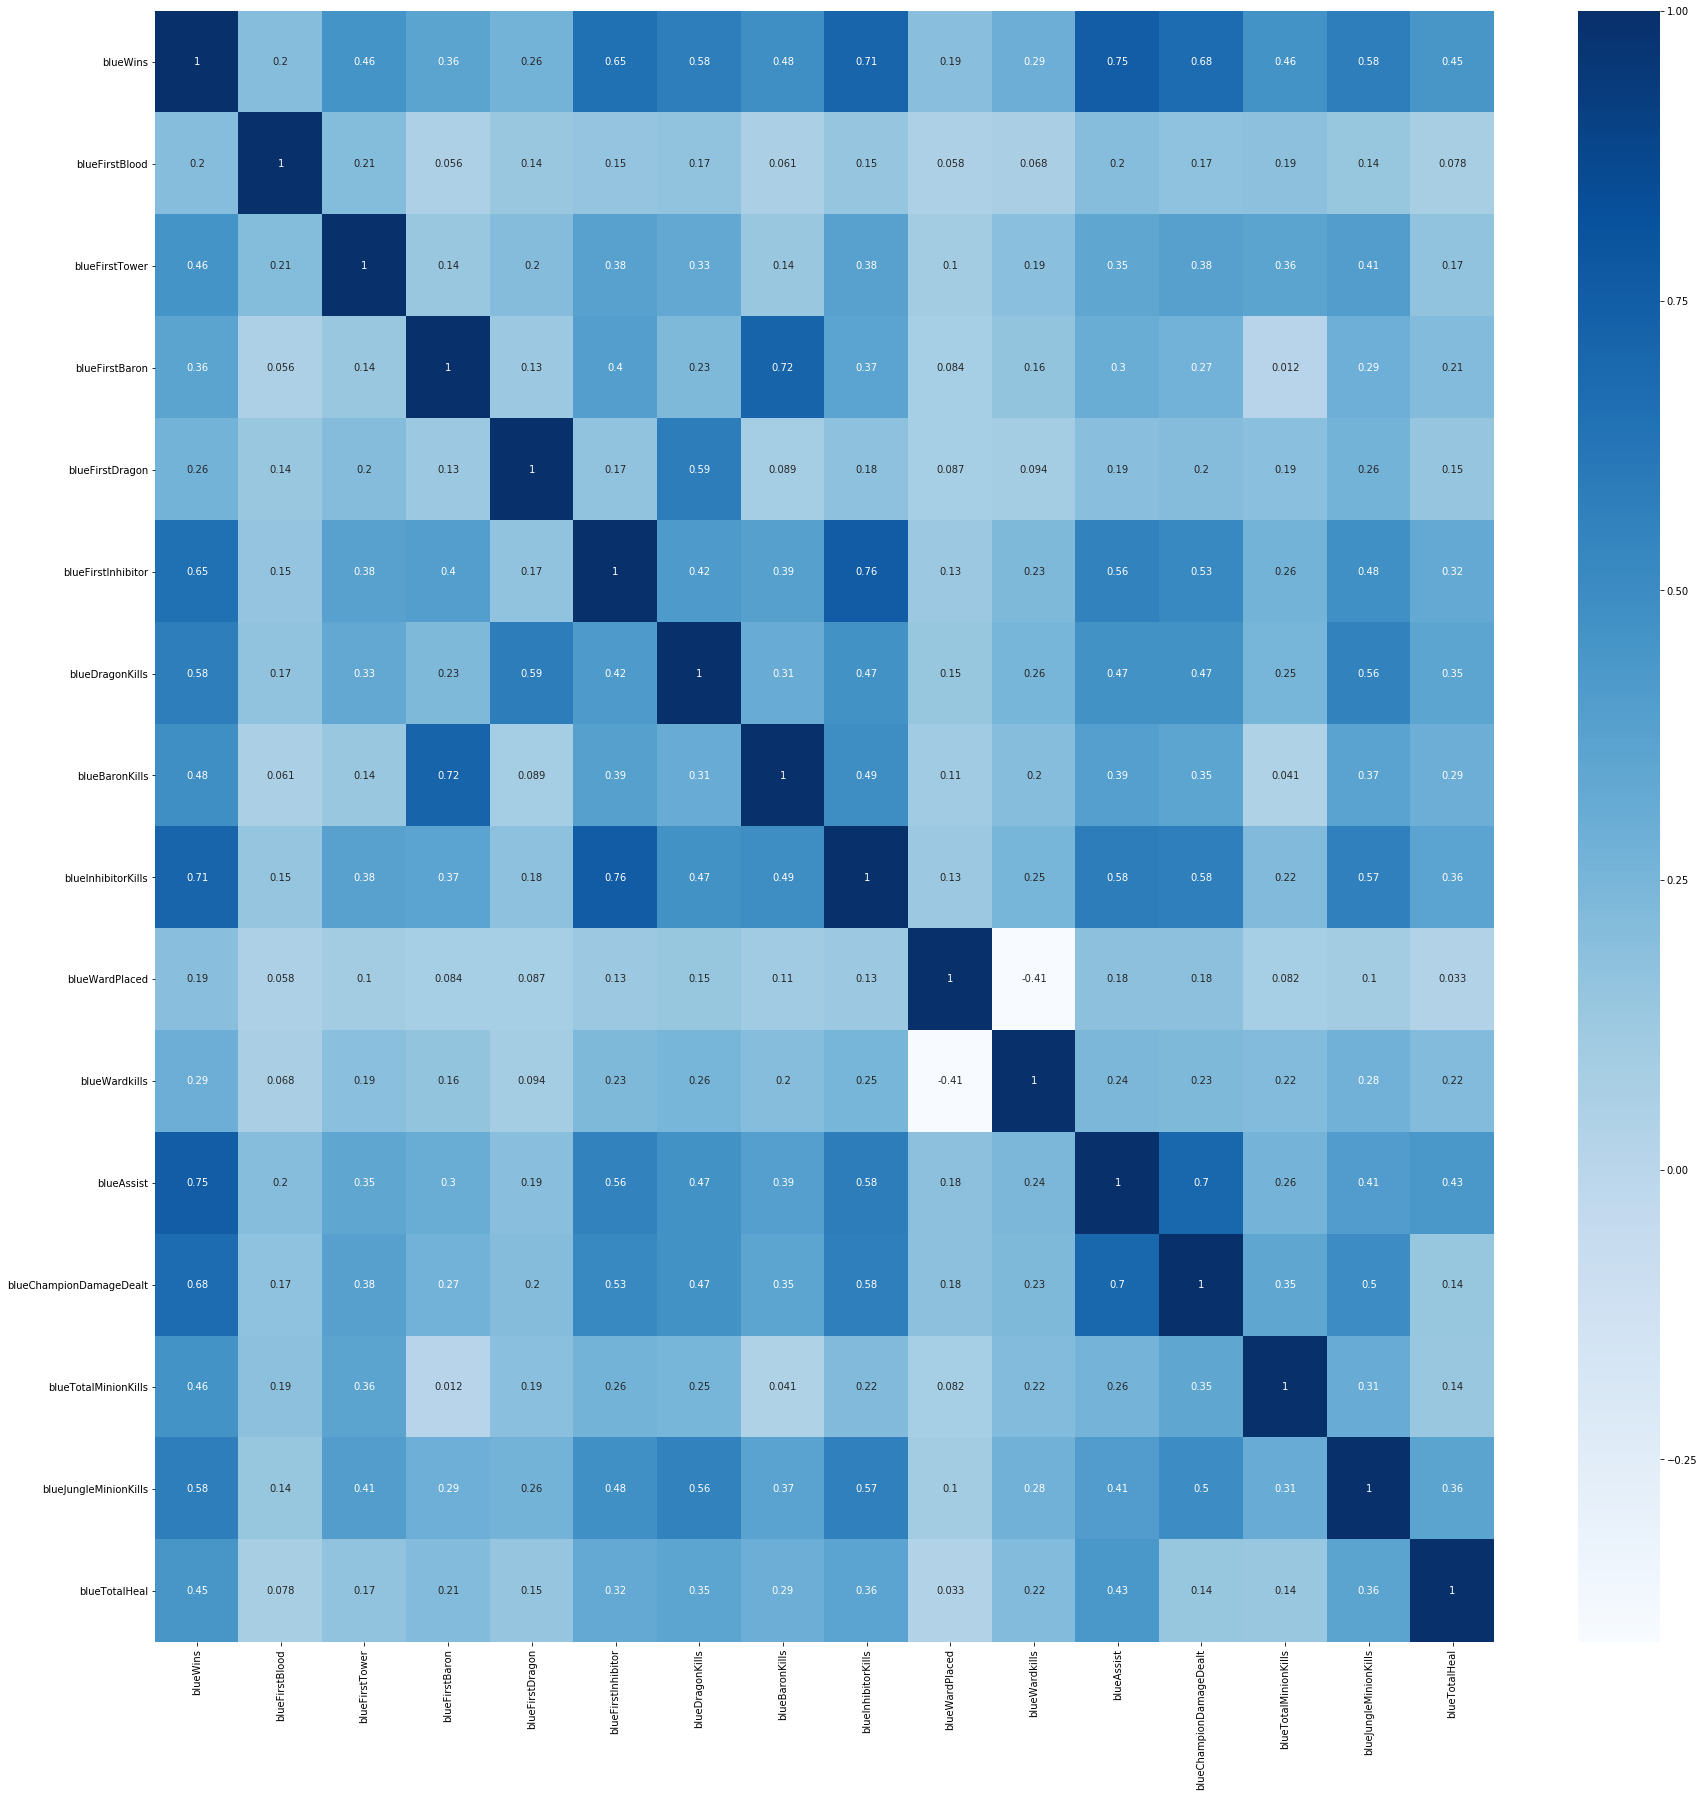

In [90]:
#Co-relation matrix re-revisited
plt.figure(figsize = (30,30))
sns.heatmap(data_set.corr(),annot = True,cmap = plt.cm.Blues)
plt.savefig('co2.png')
plt.show()

# Exploratory Data Analysis

In [91]:
data_set

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueAssist,blueChampionDamageDealt,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal
0,0,0,0,1,1,0,-2,0,0,33,-17,-27,-24259,-58,21,-40594
1,0,0,1,0,0,0,-4,-1,-1,0,-3,-29,-8154,-39,-78,-10912
2,1,1,1,1,0,1,0,1,2,3,11,58,40315,5,24,766
3,1,0,1,0,1,0,1,0,0,-4,1,21,23653,25,23,-5881
4,1,0,0,0,1,1,3,0,1,6,-1,33,22070,3,16,-4851
5,1,1,0,1,0,1,2,1,1,-2,7,24,11198,91,25,9797
6,0,0,0,0,0,0,-4,-1,-1,10,-10,-24,-10009,41,-58,-11040
7,0,0,1,0,1,0,-1,-2,-2,-12,26,-36,-13526,18,-4,-1278
8,1,1,1,1,1,1,1,1,2,-7,-6,35,30645,-52,54,-135
9,0,0,1,0,0,0,-2,0,0,-19,-7,-34,-16837,53,-14,807


In [92]:
#More inspections
win_stats = data_set.filter(like="blue").loc[data_set["blueWins"] == 1]
win_stats.describe()

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueAssist,blueChampionDamageDealt,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal
count,32659.0,32659.000000,32659.000000,32659.000000,32659.000000,32659.000000,32659.000000,32659.000000,32659.000000,32659.000000,32659.000000,32659.000000,32659.000000,32659.000000,32659.000000,32659.000000
mean,1.0,0.609204,0.747757,0.388959,0.525705,0.700021,1.005879,0.368199,1.044919,2.488411,2.684926,20.055023,12720.993907,24.754187,27.181818,6098.266022
std,0.0,0.487936,0.434307,0.487521,0.499346,0.458255,1.646856,0.712293,1.005666,13.234963,7.581520,17.278733,13679.702898,58.425177,40.133043,12644.312005
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,-4.000000,-8.000000,-121.000000,-50.000000,-117.000000,-159346.000000,-355.000000,-210.000000,-107144.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,-1.000000,10.000000,5466.000000,-11.000000,0.000000,-243.500000
50%,1.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,19.000000,12285.000000,22.000000,24.000000,5211.000000
75%,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,10.000000,7.000000,29.000000,19922.000000,60.000000,52.000000,12127.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,4.000000,9.000000,76.000000,52.000000,165.000000,160960.000000,420.000000,396.000000,132563.000000


In [93]:
lose_stats = data_set.filter(like="blue").loc[data_set["blueWins"] == 0]
lose_stats.describe()

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueAssist,blueChampionDamageDealt,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal
count,33237.0,33237.000000,33237.000000,33237.000000,33237.000000,33237.000000,33237.000000,33237.000000,33237.000000,33237.000000,33237.000000,33237.000000,33237.000000,33237.000000,33237.000000,33237.000000
mean,0.0,0.406505,0.288022,0.082529,0.267172,0.067906,-1.318079,-0.422421,-1.000301,-2.779914,-1.980865,-19.393838,-12008.068117,-35.033035,-30.085357,-6755.243253
std,0.0,0.491188,0.452848,0.275172,0.442490,0.251589,1.641318,0.717817,1.004024,13.509190,7.612900,17.007119,13315.198450,55.637475,40.574914,12863.985984
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,-4.000000,-8.000000,-112.000000,-53.000000,-143.000000,-142528.000000,-312.000000,-266.000000,-138225.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-1.000000,-2.000000,-10.000000,-6.000000,-29.000000,-19047.000000,-70.000000,-55.000000,-12858.000000
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-2.000000,-1.000000,-19.000000,-11624.000000,-32.000000,-27.000000,-5842.000000
75%,0.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,-10.000000,-4872.000000,0.000000,0.000000,-151.000000
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000,5.000000,137.000000,55.000000,109.000000,110856.000000,328.000000,323.000000,88465.000000


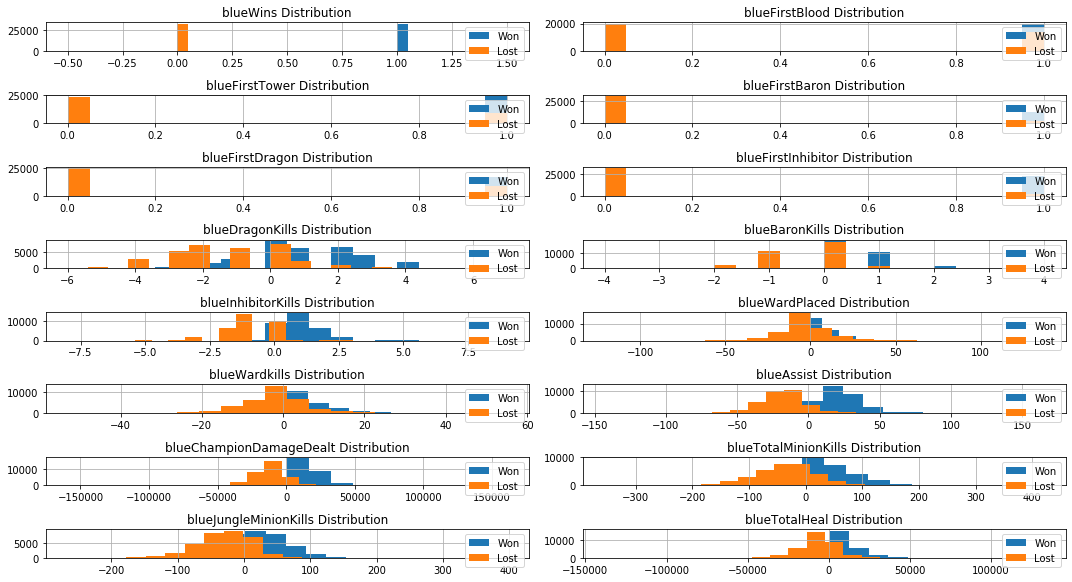

In [94]:
from matplotlib import pyplot
def compare_histograms(df1, df2, variables, n_rows, n_cols):
        fig=plt.figure(figsize=(15,15))
        for i, var_name in enumerate(variables):
            ax=fig.add_subplot(n_rows,n_cols,i+1)
            df1[var_name].hist(bins=20, ax=ax, label="Won") # for histogram
            df2[var_name].hist(bins=20, ax=ax, label="Lost") # for histogram
            ax.set_title(var_name+" Distribution")
            pyplot.legend(loc="upper right")
            plt.tight_layout()
        plt.show()



histogram_data_win = win_stats
histogram_data_lose = lose_stats
        
compare_histograms(histogram_data_win, histogram_data_lose, histogram_data_win, 15, 2)

# Data Preprocessing

In [95]:
y = data_set.iloc[:,0].values #win class
x = data_set.iloc[:,1:].values #other attributes seperated

In [96]:
#Preparing train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3,stratify=y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [97]:
'''#Double Cross Validation in order to find optimal n_estimators and max_features that results with useful accuracy. 

from sklearn.model_selection import KFold
from sklearn import tree
import matplotlib.pyplot as plt

# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(x):
	# split data
	X_train, X_test = x[train_ix, :], x[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
	model = RandomForestClassifier(random_state=1)
	# define search space
	space = dict()
	space['n_estimators'] = [10, 100, 500]
	space['max_features'] = [4, 6, 10]
	# define search
	search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train, y_train)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test)
	# evaluate the model
	acc = accuracy_score(y_test, yhat)
	# store the result
	outer_results.append(acc)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))'''

"#Double Cross Validation in order to find optimal n_estimators and max_features that results with useful accuracy. \n\nfrom sklearn.model_selection import KFold\nfrom sklearn import tree\nimport matplotlib.pyplot as plt\n\n# manual nested cross-validation for random forest on a classification dataset\nfrom numpy import mean\nfrom numpy import std\nfrom sklearn.datasets import make_classification\nfrom sklearn.model_selection import KFold\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score\n\n# configure the cross-validation procedure\ncv_outer = KFold(n_splits=10, shuffle=True, random_state=1)\n# enumerate splits\nouter_results = list()\nfor train_ix, test_ix in cv_outer.split(x):\n\t# split data\n\tX_train, X_test = x[train_ix, :], x[test_ix, :]\n\ty_train, y_test = y[train_ix], y[test_ix]\n\t# configure the cross-validation procedure\n\tcv_inner = KFold(n_splits=3, shuffle=True, random_sta

# Modal Selection - XGboost Classifier

In [98]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

classifier = XGBClassifier(n_estimators = 100,learning_rate = 0.3)
classifier.fit(x_train,y_train, eval_set=[(x_train,y_train),(x_test,y_test)])
y_pred = classifier.predict(x_test)

[0]	validation_0-error:0.02758	validation_1-error:0.03116
[1]	validation_0-error:0.02660	validation_1-error:0.03050
[2]	validation_0-error:0.02461	validation_1-error:0.02873
[3]	validation_0-error:0.02361	validation_1-error:0.02833
[4]	validation_0-error:0.02298	validation_1-error:0.02686
[5]	validation_0-error:0.02222	validation_1-error:0.02595
[6]	validation_0-error:0.02079	validation_1-error:0.02549
[7]	validation_0-error:0.02014	validation_1-error:0.02539
[8]	validation_0-error:0.01979	validation_1-error:0.02484
[9]	validation_0-error:0.01901	validation_1-error:0.02479
[10]	validation_0-error:0.01828	validation_1-error:0.02443
[11]	validation_0-error:0.01782	validation_1-error:0.02403
[12]	validation_0-error:0.01702	validation_1-error:0.02378
[13]	validation_0-error:0.01637	validation_1-error:0.02281
[14]	validation_0-error:0.01561	validation_1-error:0.02292
[15]	validation_0-error:0.01515	validation_1-error:0.02256
[16]	validation_0-error:0.01496	validation_1-error:0.02195
[17]	va

# Metrics #1-1

In [99]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm,"\n accuracy:",accuracy)

[[9727  244]
 [ 173 9625]] 
 accuracy: 0.9789063685568314


# Modal Selection - Decision Tree Classifier

In [100]:
from sklearn import tree
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier(criterion = "gini", min_samples_split=3000,max_features=4)
clf = clf.fit(x_train,y_train)
y_pred2 = clf.predict(x_test)

# Metrics #1-2

In [101]:
cm2 = confusion_matrix(y_test, y_pred2)
accuracy2 = accuracy_score(y_test, y_pred2)
print(cm2,"\n accuracy:",accuracy2)

[[9701  270]
 [1265 8533]] 
 accuracy: 0.9223531792199909


# Visualization of XGB Tree and Decision Tree 1

In [102]:
#XGB Tree as .png saved
import xgboost as xgb

format = 'png' #You should try the 'svg'

image = xgb.to_graphviz(classifier)

#Set a different dpi (work only if format == 'png')
image.graph_attr = {'dpi':'400'}

image.render('updated-GrandMaster-XGB-1', format = format)

'updated-GrandMaster-XGB-1.png'

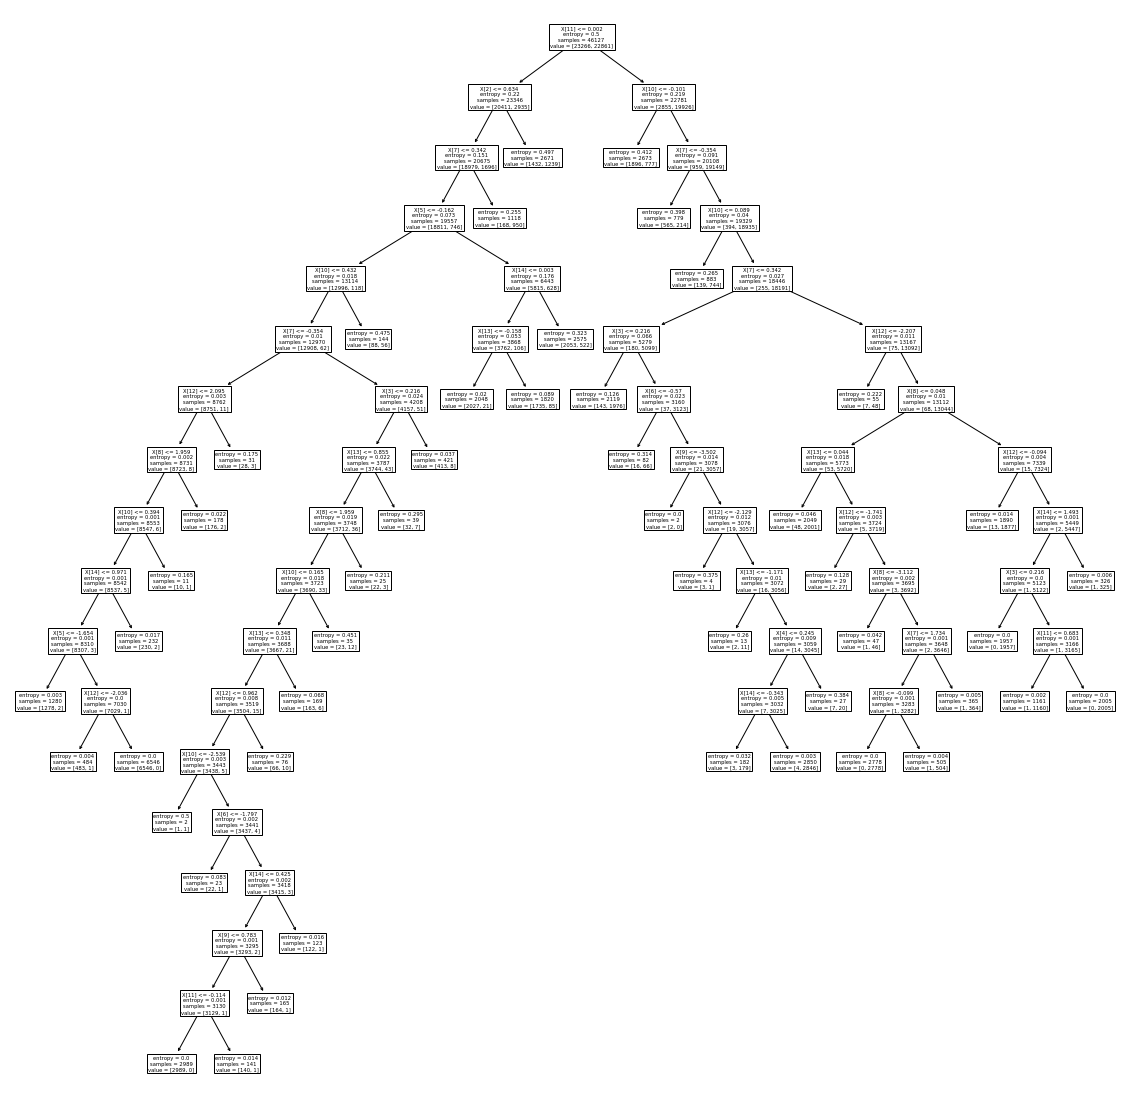

'updated-GrandMaster-Decision-1.png'

In [103]:
#Decision Tree as you can see down below and saved as .png
tree_plot = plt.figure(figsize=(20,20))
tree.plot_tree(clf)
plt.show()

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import pandas as pd
import graphviz

dot_data = export_graphviz(clf, out_file=None,filled=True, rounded=True, special_characters=True ,class_names=['0','1'])
graph = graphviz.Source(dot_data)

graph.render(filename="updated-GrandMaster-Decision-1", format="png")

# Dimensionality Reduction by PCA

In [104]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
reduction = pca.fit_transform(x_train)
reduction_test = pca.transform(x_test)
print(pca.explained_variance_ratio_)

[0.34691136]


In [105]:
data_reduced = pd.DataFrame(data = reduction,columns = ['pc1'])
data_reduced

,pc1
0,-2.181660
1,-0.908966
2,-1.973174
3,-1.901640
4,2.402320
5,3.954746
6,-1.343644
7,-1.868282
8,-0.571275
9,-1.939373


In [106]:
reduction_test

array([[ 1.75424522],
       [ 1.52654451],
       [-2.79178196],
       ...,
       [-0.31721898],
       [ 0.70966174],
       [ 1.99375605]])

In [107]:
#Preparing PC1 to put in XGB again
x_reduced = data_reduced.iloc[:,:].values

# PCA XGB Tree

In [108]:
#Fitting XGB Classifier
from xgboost import XGBClassifier
reduced_class = XGBClassifier(n_estimators = 100,learning_rate = 0.1)
reduced_class.fit(x_reduced,y_train)
y_reduced_pred = reduced_class.predict(reduction_test)

# Metrics #2-1

In [109]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test, y_reduced_pred)
accuracy = accuracy_score(y_test, y_reduced_pred)
print(cm,"\n accuracy:",accuracy)

[[9351  620]
 [ 535 9263]] 
 accuracy: 0.9415751934847488


# PCA Decision Tree

In [110]:
#Fitting Decision Tree Classifier
clf2 = tree.DecisionTreeClassifier(criterion = "gini", min_samples_split=3000)
clf2 = clf2.fit(x_reduced,y_train)
y_reduced_pred2 = clf2.predict(reduction_test)

# Metrics #2-2

In [111]:
cm2 = confusion_matrix(y_test, y_reduced_pred2)
accuracy2 = accuracy_score(y_test, y_reduced_pred2)
print(cm2,"\n accuracy:",accuracy2)

[[9353  618]
 [ 527 9271]] 
 accuracy: 0.9420810359654004


# Visualization of XGB Tree and Decision Tree 2

In [112]:
#XGB Tree as .png saved
import xgboost as xgb

format = 'png' #You should try the 'svg'

image = xgb.to_graphviz(reduced_class)

#Set a different dpi (work only if format == 'png')
image.graph_attr = {'dpi':'400'}

image.render('updated-GrandMaster-XGB-2', format = format)

'updated-GrandMaster-XGB-2.png'

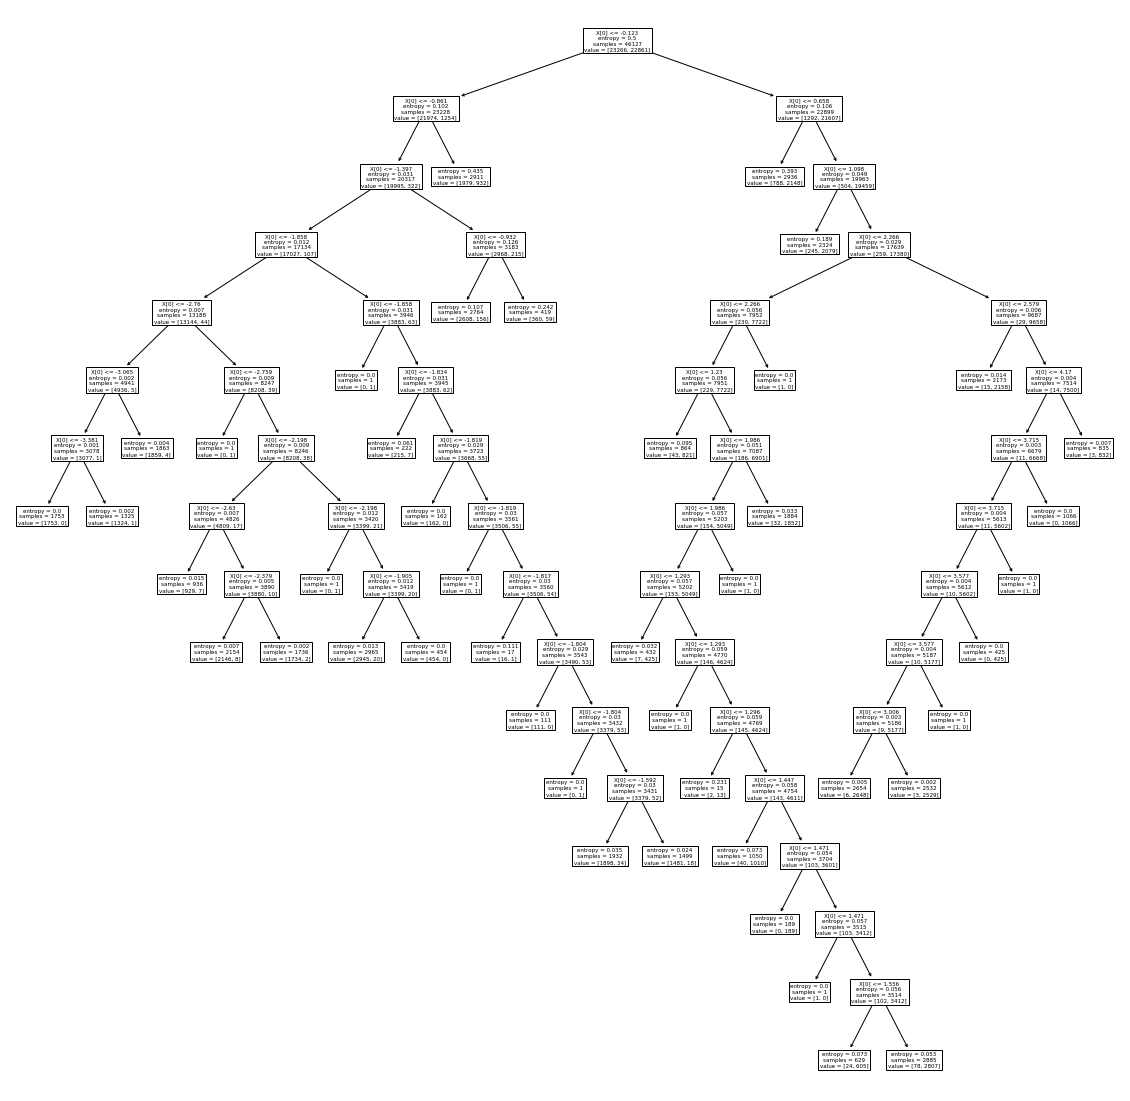

'updated-GrandMaster-Decision-2.png'

In [113]:
#Decision Tree as you can see down below and saved as .png
tree_plot = plt.figure(figsize=(20,20))
tree.plot_tree(clf2)
plt.show()

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import pandas as pd
import graphviz

dot_data = export_graphviz(clf2, out_file=None,filled=True, rounded=True, special_characters=True ,class_names=['0','1'])
graph = graphviz.Source(dot_data)

graph.render(filename="updated-GrandMaster-Decision-2", format="png")